## 로지스틱 함수(Logistic Regression)

#### odds = 일어나지 않을 확률에서의 일어날 확률
    - 커질 수록, 일어날 확률이 높다
    - ln(p/1-p) = w1x + x0
    - p/1-p = e^(w1x+x0)
    - p=1/1 + e^(-1*(w1x+x0))
    - 시그 모이드함수에다가 회귀 값을 대입해준다면, 그에 맞는 확률값을 구할 수 있다
    - 1/(1+e^-x) :  시그모이드 함수
    - C는 1/alpha이므로 작을 수록 규제가 크다 (SNM에서는 C값이 클수록 큐제가 크다)

## sklearn.linear_model.LogisticRegression
* class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
* prarmeters
    - penalty :{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’
    - C :Inverse of regularization strength , float, default=1.0
    - max_iter : 최대 몇번 학습 할건지(에포크), int, default=100
    - multi_class{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
        - 'auto' : 알아서 계산해준다
        - ‘ovr’: 이진분류
        - ‘multinomial’는 solver=’liblinear’일때 불가능.
        - ‘auto’ ---> ‘ovr’ : 데이터가 이진 분류 혹은  solver=’liblinear’일때
        - ‘auto’ ---> ‘multinomial’: 데이터가 다중 분류 혹은 solver가 나머지거 일때
    
    - solver : {‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
        - For small datasets, ‘liblinear’ is a good choice
        - ‘sag’ and ‘saga’ are faster for large ones;
        - 
* multi- classifier : 레이블이 여러개 값 일때
    - 시그모이드에 대입하는 것이 아니라, softmax function에 대입해야 한다
    - 엔트로피를 카테고리컬 엔트로피를 구해준다(one-hot encoding)


In [9]:
# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cancer= load_breast_cancer()

scaler= StandardScaler()
data_scaled= scaler.fit_transform(cancer.data)

X_train,X_test,y_train,y_test = train_test_split(data_scaled,cancer.target,test_size=0.3,random_state=0 )

In [5]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

lr_clf= LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_pred= lr_clf.predict(X_test)

print(f'accuracy:{accuracy_score(y_test,lr_pred):.3f}')
print(f'roc_auc:{roc_auc_score(y_test,lr_pred):.3f}')

accuracy:0.977
roc_auc:0.972


In [10]:
from sklearn.model_selection import GridSearchCV
params={'penalty':['l2','l1'],
        'C':[0.01,0.1,1,5,10]}
grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy',cv=3)
grid_clf.fit(data_scaled,cancer.target)

print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975


In [28]:
from sklearn.datasets import load_iris
iris=load_iris()
scaler= StandardScaler()
iris_scaled= scaler.fit_transform(iris.data)

X_train,X_test,y_train,y_test = train_test_split(iris_scaled,iris.target,test_size=0.3,random_state=0 )

lg_clf= LogisticRegression()
lg_clf.fit(X_train,y_train)
lg_pred= lg_clf.predict_proba(X_test)
pd.DataFrame(lg_pred).describe()



,0,1,2
count,45.000000,45.000000,4.500000e+01
mean,0.358300,0.357943,2.837570e-01
std,0.464811,0.363490,3.469014e-01
min,0.000026,0.004243,7.354107e-08
25%,0.002583,0.026120,1.614249e-06
50%,0.024095,0.161514,1.207245e-01
75%,0.968179,0.730649,5.657152e-01
max,0.995757,0.950313,9.899404e-01


In [26]:
lg_clf= LogisticRegression(multi_class='ovr')
lg_clf.fit(X_train,y_train)
lg_pred= lg_clf.predict_proba(X_test)
lg_pred= lg_clf.predict_proba(X_test)
pd.DataFrame(lg_pred).describe()

,0,1,2
count,45.000000,45.000000,45.000000
mean,0.335794,0.356153,0.308052
std,0.425608,0.268351,0.304600
min,0.000239,0.018802,0.000019
25%,0.005230,0.106595,0.000069
50%,0.043824,0.277675,0.236031
75%,0.881048,0.542622,0.536531
max,0.981176,0.917569,0.903337


In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# boston 데이터셋 로드
bostondf = pd.read_csv('../datasets/Boston.csv', index_col=0)

# boston dataset의 target array는 주택 가격. price 컬럼으로 설정
bostondf.rename(columns = {'medv':'price'},inplace=True)

y_target = bostondf['price']
X_data = bostondf.drop(['price'],axis=1,inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores :  [ -7.88 -13.14 -20.57 -46.23 -18.88]
 5 folds 의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
 5 folds 의 평균 RMSE : 4.423 


In [2]:

def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv =5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### {0} #####'.format(model))
    print("avg socres : ", np.round(avg_rmse, 3))

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

##### DecisionTreeRegressor(max_depth=4, random_state=0) #####
avg socres :  5.978
##### RandomForestRegressor(n_estimators=1000, random_state=0) #####
avg socres :  4.423
##### GradientBoostingRegressor(n_estimators=1000, random_state=0) #####
avg socres :  4.269


<Axes: >

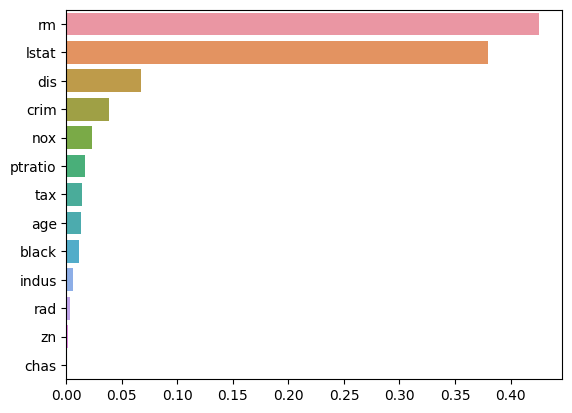

In [4]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습한다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


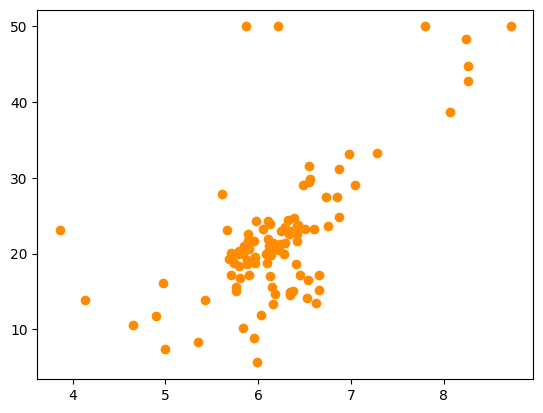

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

bostondf_sample = bostondf[['rm', 'price']]
bostondf_sample = bostondf_sample.sample(n=100, random_state=0)
print(bostondf_sample.shape)
plt.figure()
plt.scatter(bostondf_sample.rm, bostondf_sample.price, c='darkorange')



In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5~8.5까지 100개 데이터 셋 생성.
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 rm만, 그리고 결정 데이터인 price 추출
X_feature = bostondf_sample['rm'].values.reshape(-1,1)
y_target = bostondf_sample['price'].values.reshape(-1,1)

# 학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)



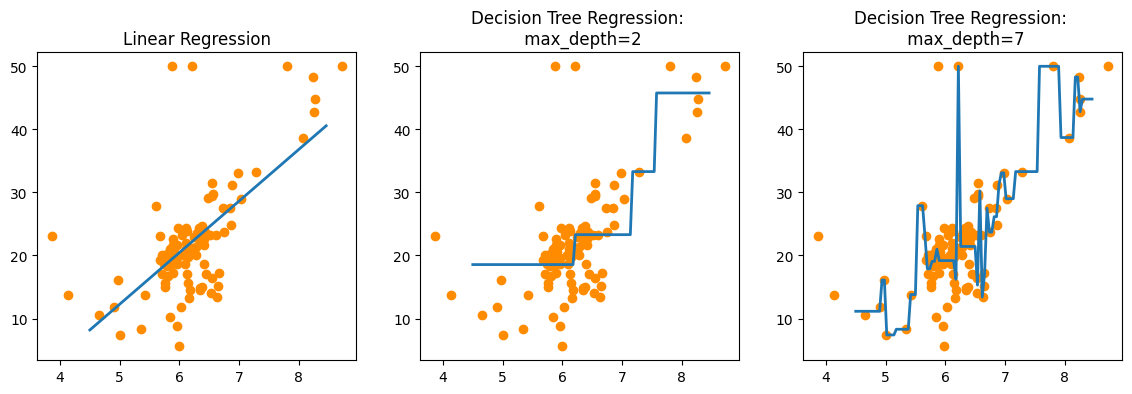

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5~8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostondf_sample.rm, bostondf_sample.price, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostondf_sample.rm, bostondf_sample.price, c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth:2', linewidth=2)

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostondf_sample.rm, bostondf_sample.price, c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth:2', linewidth=2)